In [48]:
from spectral import *
import numpy as np

In [6]:
#pip install spectral

In [11]:
 img = open_image(r'C:\Users\tiwar\OneDrive\Documents\Desktop\SPH\sample-data\92AV3C.lan').load()

In [12]:
(m, c) = kmeans(img, 20, 30)

spectral:INFO: k-means iteration 1 - 21024 pixels reassigned.
spectral:INFO: k-means iteration 2 - 11214 pixels reassigned.
spectral:INFO: k-means iteration 3 - 4726 pixels reassigned.
spectral:INFO: k-means iteration 4 - 1767 pixels reassigned.
spectral:INFO: k-means iteration 5 - 1240 pixels reassigned.
spectral:INFO: k-means iteration 6 - 1420 pixels reassigned.
spectral:INFO: k-means iteration 7 - 1442 pixels reassigned.
spectral:INFO: k-means iteration 8 - 1205 pixels reassigned.
spectral:INFO: k-means iteration 9 - 1041 pixels reassigned.
spectral:INFO: k-means iteration 10 - 934 pixels reassigned.
spectral:INFO: k-means iteration 11 - 977 pixels reassigned.
spectral:INFO: k-means iteration 12 - 1027 pixels reassigned.
spectral:INFO: k-means iteration 13 - 1019 pixels reassigned.
spectral:INFO: k-means iteration 14 - 1011 pixels reassigned.
spectral:INFO: k-means iteration 15 - 904 pixels reassigned.
spectral:INFO: k-means iteration 16 - 702 pixels reassigned.
spectral:INFO: k-me

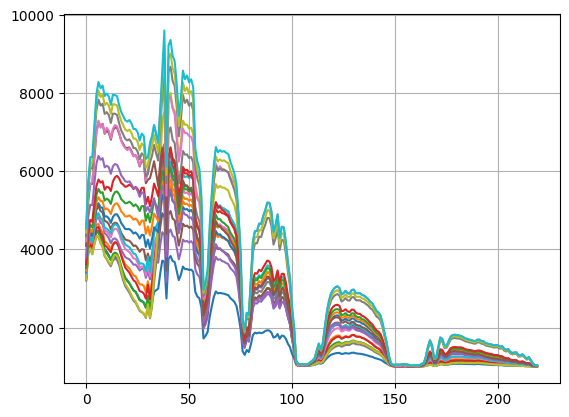

In [13]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(c.shape[0]):
     plt.plot(c[i])
plt.grid()

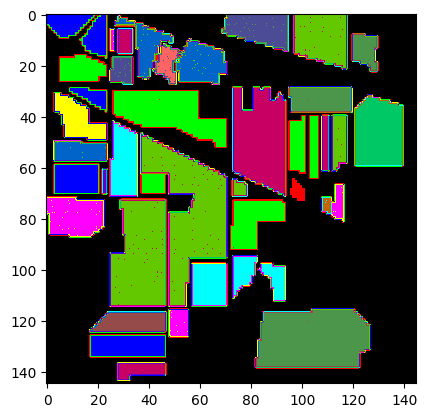

In [15]:
gt = open_image(r'C:\Users\tiwar\OneDrive\Documents\Desktop\SPH\sample-data\92AV3GT.GIS').read_band(0)
v = imshow(classes=gt)

In [17]:
classes = create_training_classes(img, gt)

In [20]:
gmlc = GaussianClassifier(classes)

spectral:INFO: Setting min samples to 220
spectral:WARNING: Omitting class   1 : only 54 samples present
spectral:WARNING: Omitting class   7 : only 26 samples present
spectral:WARNING: Omitting class   9 : only 20 samples present
spectral:WARNING: Omitting class  13 : only 212 samples present
spectral:WARNING: Omitting class  16 : only 95 samples present


In [21]:
clmap = gmlc.classify_image(img)


Processing...done   


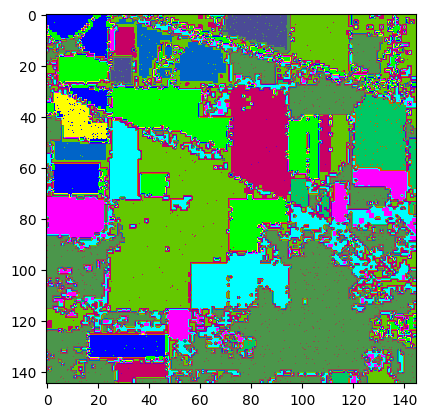

In [22]:
 v = imshow(classes=clmap)

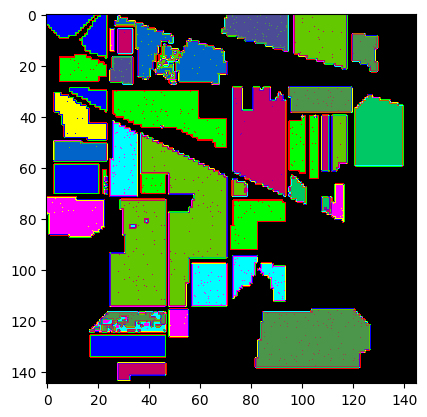

In [23]:
gtresults = clmap * (gt != 0)
v = imshow(classes=gtresults)

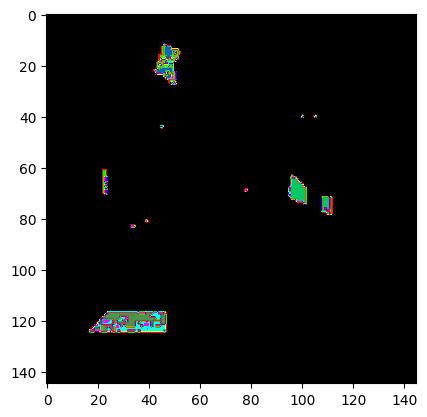

In [24]:
gterrors = gtresults * (gtresults != gt)
v = imshow(classes=gterrors)

In [25]:
pc = principal_components(img)

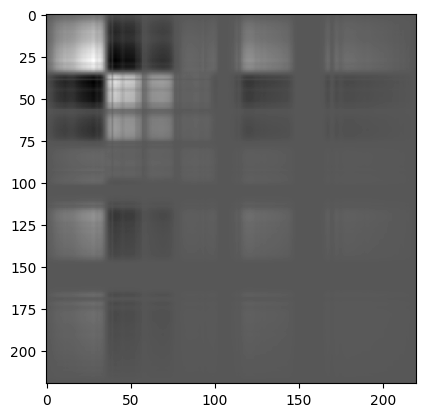

In [26]:
v = imshow(pc.cov)

In [27]:
 pc_0999 = pc.reduce(fraction=0.999)

In [29]:
len(pc_0999.eigenvalues) # How many eigenvalues are left?

32

In [31]:
img_pc = pc_0999.transform(img)

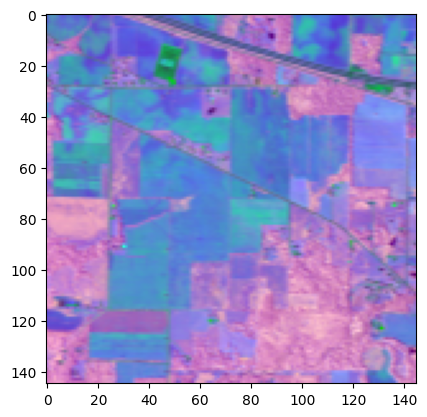

In [32]:
v = imshow(img_pc[:,:,:3], stretch_all=True)

spectral:INFO: Setting min samples to 32
spectral:WARNING: Omitting class   7 : only 26 samples present
spectral:WARNING: Omitting class   9 : only 20 samples present


Processing...done   


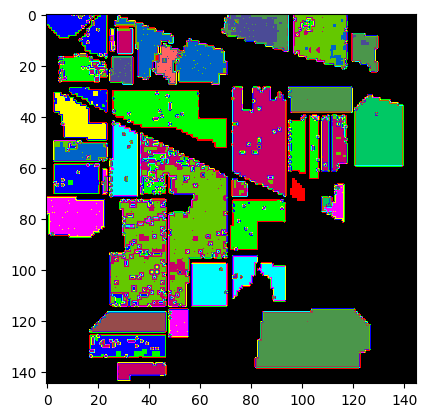

In [34]:
classes = create_training_classes(img_pc, gt)

gmlc = GaussianClassifier(classes)

clmap = gmlc.classify_image(img_pc)

clmap_training = clmap * (gt != 0)

v = imshow(classes=clmap_training)


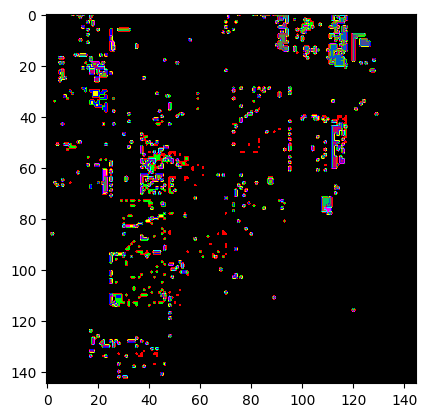

In [37]:
 training_errors = clmap_training * (clmap_training != gt)

 v = imshow(classes=training_errors)

In [38]:
In [32]: classes = create_training_classes(img, gt)

In [33]: fld = linear_discriminant(classes)

In [34]: len(fld.eigenvectors)

220

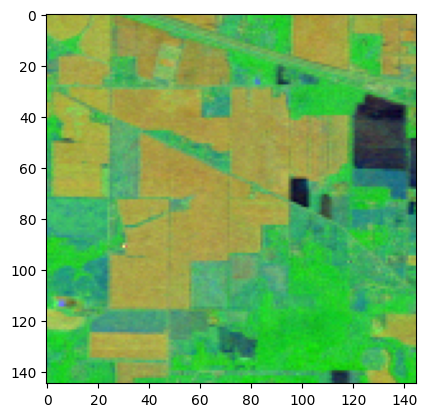

In [39]:
img_fld = fld.transform(img)

v = imshow(img_fld[:, :, :3])

spectral:INFO: Setting min samples to 15


Processing...done   


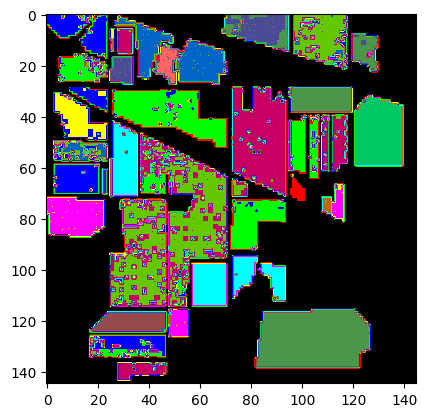

In [40]:
classes.transform(fld.transform)

gmlc = GaussianClassifier(classes)

clmap = gmlc.classify_image(img_fld)

clmap_training = clmap * (gt != 0)

v = imshow(classes=clmap_training)

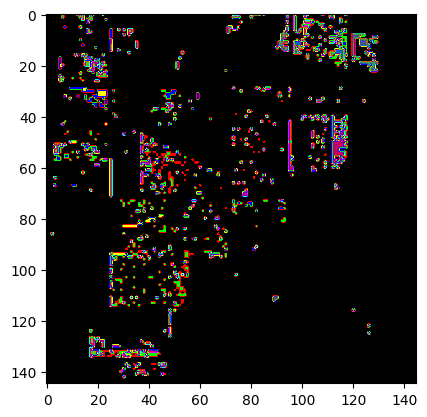

In [41]:
fld_errors = clmap_training * (clmap_training != gt)

v = imshow(classes=fld_errors)

In [59]:
 rxvals = rx(img)

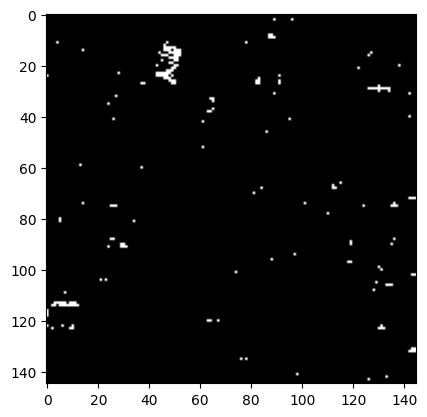

In [60]:
from scipy.stats import chi2

nbands = img.shape[-1]

P = chi2.ppf(0.999, nbands)

v = imshow(1 * (rxvals > P))

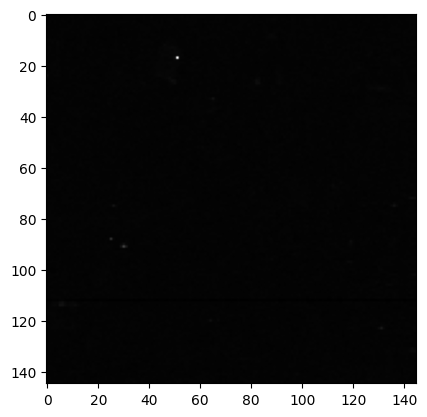

In [61]:
 v = imshow(rxvals)

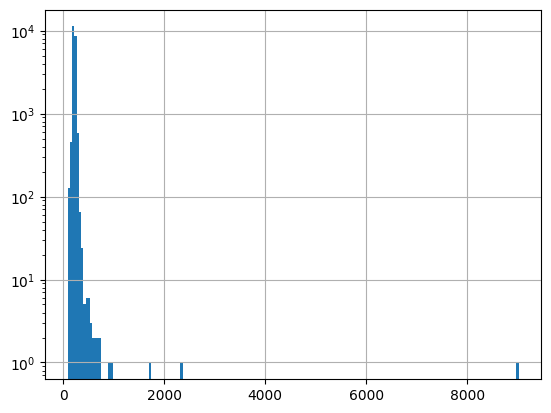

In [62]:
import matplotlib.pyplot as plt

f = plt.figure()

h = plt.hist(rxvals.ravel(), 200, log=True)

h = plt.grid()

In [63]:
print(np.sort(rxvals.ravel())[-10:])

[ 665.17211462  675.85801536  683.58190673  731.4872873   739.95211335
  906.98669373  956.49972325 1703.20957949 2336.11246149 9018.65517253]


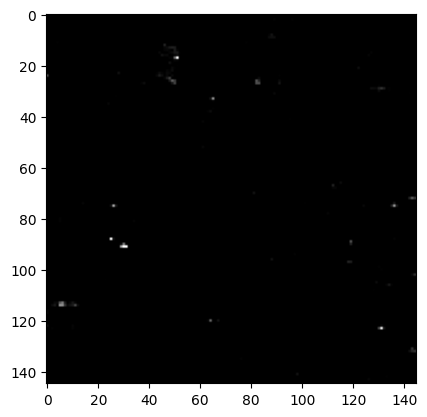

In [64]:
 v = imshow(rxvals, stretch=(0.99, 0.9999))

In [ ]:
print(v)

In [ ]:
rxvals = rx(img, window=(5,21))

In [ ]:
 C = cov_avg(img, gt)
rxvals = rx(img, window=(5,21), cov=C)